<a href="https://colab.research.google.com/github/ndecavel/tdwi-llm/blob/main/%5BMAIN%5D_Lab_1_LLM_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Session 1: The Art of Prompting LLMs

## Overview

Welcome to Part 1(a) of our AI workshop series. In this session, you'll dive into the world of prompting large language models (LLMs), gaining some initial familiarity with effectively communicating with LLMs.

## Learning Objectives
By the end of this lab, you will:
1. Craft effective prompts for diverse AI applications
2. Understand and apply various prompting techniques
3. Gain insights into AI safety through hands-on experience

## 0. Using the tech stack

* **Google Colab**: We'll use this free, cloud-based platform for easy setup and access to computational resources. While we're focusing on Colab, you can easily replicate this project in your local computing environment. (You're here!)
* To run "cells" in Colab, either press the "Play" button in the upper left of the cell, or type Shift+Enter (hold down the keys together briefly).

* **LiteLLM**: This library helps streamline interactions with a wide range of pre-trained LLMs. We'll use it to load and run our LLMs, and interact with the LLM.

* **LLM**: We'll start with a handful of OpenAI and Gemini models.

____
## LAB 1-A: Prompting Fundamentals

For this hands-on session, we will explore:

- **Prompt Anatomy**: Explore system instructions, user inputs, and AI responses.
- **Token Mechanics**: Understand what tokens are, how they are used in LLMs, and how to estimate both input and output costs of token use.
- **Conversation Dynamics**: Compare single-turn queries and multi-turn dialogues.

To begin, we need to install litellm in order to have a simple, unified interface to communicate with an LLM

____
#### Imports and Environmental Variables

In [ ]:
import os

from litellm import completion

from IPython.display import display, Markdown, clear_output


os.environ["OPENAI_API_KEY"] = ### INSERT YOUR OPENAI API KEY
os.environ["GEMINI_API_KEY"] = ### INSERT YOUR GEMINI API KEY

### Similarly, you can use use other providers such as Anthropic, Cohere, OpenRouter, Azure, Replicate, etc. 

### Create a simple LLM

---
Now let's try making a very simple LLM, technically a text-completion model.

In [ ]:
# Define the model options
gemini_models = ['gemini/gemini-pro', 'gemini/gemini-1.5-flash', 'gemini/gemini-2.0-flash']
openai_models = ['openai/gpt-4o-mini', 'openai/gpt-4o', 'openai/o1-mini']


### Select our model from one of the above or any from litellm's list of provided models
llm_model = 'gemini/gemini-2.0-flash'

In [ ]:
# Now send a prompt to the LLM
user_prompt = "What is the elevation of Mount Kilimanjaro?"
messages = [{"content": user_prompt, "role": "user"}]


response = completion(model=llm_model, messages=messages)
display(Markdown(response.choices[0].message.content))

**Congratulations**, you just created & programmatically interacted with your first LLM. 🎉



### Task 1

Enter a new "prompt_factoid" below to test the LLM's responses.

Try:

*   Changing the question to a different 'factoid';
*   Asking a more open-ended question;
*   Asking a more business-specific question.


*You can also go back to the previous code above and change the LLM model! Notice how the same prompt can have significantly different responses.*


In [ ]:
# Update the below user_prompt with your own input. 
user_prompt = \
"""
[INSERT INPUT PROMPT HERE]
"""

messages = [{"content": user_prompt, "role": "user"}]


response = completion(model=llm_model, messages=messages)
display(Markdown(response.choices[0].message.content))

**PAUSE** here. Did you do the task above? What did you learn?

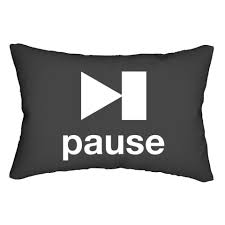

## Create a Chat LLM
---
Now let's try creating a slightly-more sophisticated model, a Chat LLM.

What makes a chat model different from another LLM? A Chat LLM can engage in dialogue, going back & forth with the user, unlike a text-completion LLM which responds (once) to a (single) prompt. Therefore, we'll have to create a slightly more complex set of prompts to interact with the model, including System Messages and User (or Human) Messages.

### Prompt Anatomy

We usually think of a "prompt" as a simple piece of text that we send to a model, as we have been doing thus far. But prompts can include more than that. For example, they might include **system instructions** (like, "Act as an expert in Python programming") or different **parameters** like temperature to control randomness.

There are three types of messages with an LLM:

* **system messages** describe the behavior of the AI assistant. A useful system message for data science use cases is "You are a helpful assistant who understands data science."
* **user messages** describe what you want the AI assistant to say. We'll cover examples of user messages throughout this tutorial
* **assistant messages** describe previous responses in the conversation. We'll cover how to have an interactive conversation later in this lab.

The first message should be a system message. Additional messages should alternate between the user and the assistant.

Let's create a chat LLM, then be a little more specific about our prompts to it.

In [ ]:
# Define the system message
SYSTEM_MESSAGE = 'You are a helpful assistant who understands the business of interior decorating.'

# Define the user message
USER_MESSAGE = 'What color paint should I use for a living room in a house on the beach in San Diego?'

messages_chat = [
    {"content": SYSTEM_MESSAGE, "role": "system"},
    {"content": USER_MESSAGE, "role": "user"}
]

### Note: We can add streaming in order to help with seeing the initial outputs sooner.
response = completion(model=llm_model, messages=messages_chat, temperature=1, stream=True)
res_so_far = ""
for part in response:
  if part.choices[0].delta.content:
    res_so_far += part.choices[0].delta.content
  print(res_so_far)
  clear_output(wait=True)

In [ ]:
display(Markdown(res_so_far))

**Congratulations**, you just created & programmatically interacted with your first chat LLM. 🎉

### Task 2

Try setting a different `SYSTEM_MESSAGE` variable in the below cell and see how it impacts the response.

Try:

*   Changing the role of the system;
*   Setting a "stylized" response for the system (e.g.: 'in the style of Gandalf from The Hobbit');
*   Etc.


In [ ]:
# Define a new system message
SYSTEM_MESSAGE = input("Enter a new prompt (instruction) into the box below,\
  \nsomething like 'You are a lazy hourly worker at a paint store' or\
  \n'Respond in the style of Gandalf from The Hobbit'\
  \n& click 'Enter'. ")

messages_chat = [
    {"content": SYSTEM_MESSAGE, "role": "system"},
    {"content": USER_MESSAGE, "role": "user"}
]

### Note: We can add streaming in order to help with seeing the initial outputs sooner.
response = completion(model=llm_model, messages=messages_chat, temperature=1)
display(Markdown(response.choices[0].message.content))

**PAUSE** here. Did you do the task above? What did you learn?

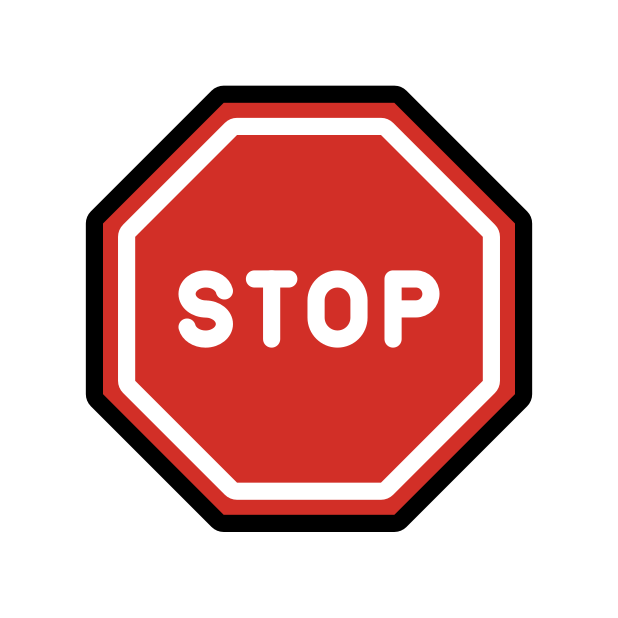

**STOP** here - end of Lab 1-A.

## LAB 1-B Complex Prompting

### Prompt Templates

Our prompts are starting to get a little complicated, with different types of messages and enforced order.

Let's explore the use of a "**prompt template**" to help with all of this, giving us a structured starting point for our prompts to pass to the chat *LLM*.

In [ ]:
from typing import List, Dict
import pydantic

class SimplePromptTemplate(pydantic.BaseModel):
    city: str

    def format_string(self) -> str:
        return f"What color paint should I use for a house in {self.city}."


In [ ]:
# Provide the value for the placeholder to create the prompt
user_input = input("Enter a city (e.g., San Diego):").strip()
filled_prompt = SimplePromptTemplate(city=user_input).format_string()
print(filled_prompt)

In [ ]:
# Define the system message
SYSTEM_MESSAGE = 'You are a helpful assistant who understands the business of interior decorating.'

messages_chat = [
    {"content": SYSTEM_MESSAGE, "role": "system"},
    {"content": filled_prompt, "role": "user"}
]

### Note: We can add streaming in order to help with seeing the initial outputs sooner.
response = completion(model=llm_model, messages=messages_chat, temperature=1)
display(Markdown(response.choices[0].message.content))

### Token Mechanics

Our goals in this section are to understand what tokens are, how they are used in LLMs, and how to estimate both input and output costs of token use. Tokens can be thought of as pieces of words. Before the LLM API processes a request, the input is broken down into *tokens*. These tokens are not necessarily defined by exactly where the words start or end - tokens can include trailing spaces and even sub-words.

* For hands-on exploration of tokenization, you can use OpenAI's [interactive Tokenizer tool](https://platform.openai.com/tokenizer), which allows you to calculate the number of tokens and see how text is broken into tokens.

* You can find details on OpenAI's token pricing [here](https://openai.com/pricing).

Let's first look at an extremely simple example of tracking token usage for a single LLM call.

In [ ]:
USER_INPUT = 'Can you tell me a 5-sentence joke?'
response = completion(model=llm_model,temperature=0.8,
                      messages=[{'role': 'user', 'content': USER_INPUT}])

display(Markdown(response.choices[0].message.content))

print(f"Usage Information:\n{response.json()['usage']}")

### Task 3

Notice that if you rerun the above cell multiple times, you will get different prompt outputs and costs (total tokens) associated with it!

Try running that code a few more times.
* Does the output change?
* Does the output change if you change the prompt?
* Does the output change if you make the prompt more complex?

In [ ]:
USER_INPUT = 'Can you tell me a 5-sentence joke?'

response = completion(model=llm_model,temperature=0.8,
                      messages=[{'role': 'user', 'content': USER_INPUT}])

display(Markdown(response.choices[0].message.content))

print(f"Usage Information:\n{response.json()['usage']}")

**PAUSE** here. Did you do the task above? What did you learn?

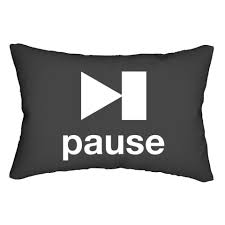

### Model Experimentation

For the second part of our lab, we will perform:

- **Model Comparison**: Evaluate different LLMs
- **Parameter Experimentation**: Experiment with temperature, top_p and other parameter settings
- **Advanced Techniques**: Practice zero-shot, few-shot, and Chain-of-Thought prompting

**Model Comparison**

Let's start by comparing OpenAI's `gpt-4o-mini` with Gemini's `gemini-1.5-flash`.

Check to see if the responses differ at all from the previous responses you received.

In [ ]:
prompt_to_test = "What is the biggest animal in the world?"



openai_response = completion(model='openai/gpt-4o-mini',temperature=0.8,
                      messages=[{'role': 'user', 'content': prompt_to_test}])

gemini_response = completion(model='gemini/gemini-1.5-flash',temperature=0.8,
                      messages=[{'role': 'user', 'content': prompt_to_test}])

print("GPT-4o-mini response:\n\t", openai_response.choices[0].message.content)
print("Gemini-1.5-flash response:\n\t", gemini_response.choices[0].message.content)


**PAUSE**, and consider the above. Play with it! Try other questions!

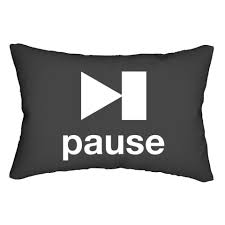

### Parameter Experimentation

Try simple things like changing the temperature of the model.

In [ ]:
for temperature in [0, 0.5, 1]:
  print(f"Temperature = {temperature}:")
  response = completion(model='gemini/gemini-pro',temperature=temperature,
                      messages=[{'role': 'user', 'content': "Why is the sky blue?"}])
  display(Markdown(response.choices[0].message.content))

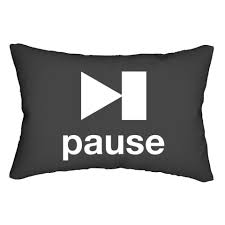

**PAUSE** here. What did you notice about the different temperature settings?

### Advanced Techniques

Practice zero-shot, few-shot, and Chain-of-Thought prompting.

**Zero-Shot Prompting**

Zero-shot prompting occurs when a model is asked to perform a task without any prior examples or context about how to perform that specific task. The prompt must be self-contained, as the model relies solely on its pre-trained knowledge to generate a response.

Example Prompt:
* Summarize the key impacts of the 2020 global pandemic on remote work trends.

In this case, the model is expected to understand what is being asked and use its internal knowledge to provide a summary without any additional examples or guidance.


In [ ]:
# try zero-shot
prompt = "Summarize the key impacts of the 2020 global pandemic on remote work trends."
res_zero = completion(model='gemini/gemini-1.5-flash',temperature=temperature,
                      messages=[{'role': 'user', 'content': prompt}])

display(Markdown(res_zero.choices[0].message.content))


**Few-Shot Prompting**

Few-shot prompting involves providing a few examples to the model before presenting the actual task. This approach helps the model understand the desired format or the specific type of response needed.

Example Prompt:

```
Example 1: Translate the English phrase "Hello, how are you?" to French.
Answer: Bonjour, comment ça va?

Example 2: Translate the English phrase "What time is it?" to French.
Answer: Quelle heure est-il?

Prompt: Translate the English phrase "Where is the nearest restaurant?" to French.
```

Here, the model is shown two examples of translation tasks, which sets the expectation that it should translate the third phrase from English to French in a similar format.

In [ ]:
# try few-shot prompting
prompt = """
  Below are a few examples, followed by the prompt for you to follow.

  Example 1: Translate the English phrase "Hello, how are you?" to French.
  Answer: Bonjour, comment ça va?

  Example 2: Translate the English phrase "What time is it?" to French.
  Answer: Quelle heure est-il?

  Prompt: Translate the English phrase "Where is the nearest restaurant?" to French."""

res_few = completion(model='gemini/gemini-1.5-flash',temperature=temperature,
                    messages=[{'role': 'user', 'content': prompt}])

display(Markdown(res_few.choices[0].message.content))

**Chain-of-Thought Prompting**

Chain-of-Thought prompting guides the model through a logical sequence of steps or thoughts to reach a conclusion, particularly useful for complex reasoning tasks. This method helps models handle problems that require multiple inferential steps.

Example Prompt:

```
Question: A farmer has 17 sheep, and all but 9 die. How many are left alive?
Chain of Thought: The phrase "all but 9 die" means that 9 sheep remain alive.
Answer: 9
```

In this example, the prompt explicitly outlines the reasoning process needed to answer the question, leading the model to the correct interpretation and response.

In [ ]:
# try chain-of-thought prompting
prompt = """
  I will pose a question, and you will provide your chain-of-thought reasoning to reach the answer.

  Question: A farmer has 17 sheep, and all but 9 die. How many are left alive?"""

res_cot = completion(model='gemini/gemini-1.5-flash',temperature=temperature,
                    messages=[{'role': 'user', 'content': prompt}])

display(Markdown(res_cot.choices[0].message.content))


**Usage Tips:**

* **Zero-Shot**: Useful when querying general knowledge or opinions, or when the task is straightforward.
* **Few-Shot**: Effective for tasks that require specific formats or where a model needs examples to "learn" the task quickly.
* **Chain-of-Thought**: Best for complex reasoning, mathematics, or multi-step logical problems.

## 3. AI Safety Challenge

For the third and final part of this lab, we will do a:

- **Prompt Hacking Exercise**: Test the limits of AI safety with the Gandalf challenge*
  - URL: https://gandalf.lakera.ai/baseline
  - Objective: Attempt to "hack" the AI chatbot using creative prompting techniques
  - Time: Utilize any remaining lab time to see if you can get through all of the levels!

*Note: For further exploration, look into safety tools like Meta's Prompt Guard and LLaMA Guard.
